# Path 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive')

Mounted at /content/drive


# Package

In [2]:
import os
import yaml
import numpy as np
from tqdm import tqdm
from itertools import product

import torch.cuda
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Config

In [3]:
import yaml

In [4]:
with open('.config.yaml', 'r') as f:
    args = yaml.safe_load(f)
args

{'num_classes': 21,
 'hidden_layer': 2,
 'batch_size': 16,
 'lr': 0.01,
 'weight_decay': 0.9,
 'epochs': 50,
 'raw_size': 1024,
 'post_size': 224,
 'train_size': 1500,
 'val_size': 124,
 'test_size': 124}

In [5]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
args['device'] = device
print(torch.cuda.get_device_name())

Tesla V100-SXM2-16GB


In [6]:
torch.backends.cudnn.benchmark = True

# Model

In [ ]:
#import torchvision
#import torch

In [ ]:
#torchvision.__version__

'0.13.1+cu113'

In [ ]:
#model = torchvision.models.detection.retinanet_resnet50_fpn(num_classes = 3, pretrained=False, pretrained_backbone = True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and will be removed in 0.15, please use 'weights_backbone' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [7]:
from src.retinanet_model2 import load_model

model = load_model(args['num_classes']).to(device)
# model

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth


  0%|          | 0.00/130M [00:00<?, ?B/s]

AttributeError: ignored

## Load parameter

In [8]:
model.load_state_dict(torch.load('snapshot/model/45th_epoch.pt'))

RuntimeError: ignored

# Dataset

In [ ]:
import torchvision
# train_dataset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/data/training/processed_train')
# train_dataset = torch.load('/content/drive/MyDrive/data/training/processed_train/OBJ00013_PS3_K3_NIA0078_img')
# torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True, **kwargs, drop_last = True if train else False)

class objectdataset(torch.utils.data.Dataset) :
    def __init__(self, root, transforms = None) :
        self.root = root
        self.lists = list(sorted(os.listdir(root)))
        self.transforms = transforms
        self.images = [file for file in self.lists if file.endswith("_img")]
        self.targets = [file for file in self.lists if file.endswith("_target")]

    def __getitem__(self, idx) : 
        img_path = os.path.join(self.root, self.images[idx])
        target_path = os.path.join(self.root, self.targets[idx])
        if(self.transforms == None) :
            images = torch.load(img_path)
            targets = torch.load(target_path)
            id = torch.tensor([idx])

        ##안돌아간다면 자료형, tensor형태 확인 필요

        ##transfrom이 none이 아닐 때에는 코드 추가 필요

        return images, targets

    def __len__(self) :
        return len(self.images)
        


In [ ]:
train_dataset = objectdataset('/content/drive/MyDrive/data/training/processed_train', None)
# valid_dataset = objectdataset()

# Predict

In [ ]:
train_dataset[0][0]

(tensor([[[-0.4667, -0.3882, -0.4510,  ..., -0.9059, -0.8980, -0.7412],
          [-0.4118, -0.4353, -0.5137,  ..., -0.8118, -0.8980, -0.9216],
          [-0.4902, -0.4667, -0.5294,  ..., -0.7490, -0.8588, -0.8824],
          ...,
          [-0.7490, -0.7647, -0.7412,  ..., -0.2627, -0.3412, -0.3725],
          [-0.6549, -0.7569, -0.7569,  ..., -0.1922, -0.3412, -0.3725],
          [-0.5765, -0.7098, -0.7647,  ..., -0.1216, -0.2863, -0.3804]],
 
         [[-0.5529, -0.4980, -0.5216,  ..., -0.8902, -0.8431, -0.6471],
          [-0.4980, -0.5216, -0.5686,  ..., -0.8745, -0.8824, -0.8745],
          [-0.5686, -0.5294, -0.5765,  ..., -0.8118, -0.9137, -0.8980],
          ...,
          [-0.7333, -0.7176, -0.7098,  ..., -0.1922, -0.2706, -0.3098],
          [-0.6392, -0.7255, -0.7255,  ..., -0.1216, -0.2627, -0.3020],
          [-0.5686, -0.7098, -0.7255,  ..., -0.0431, -0.2157, -0.3098]],
 
         [[-0.5843, -0.5922, -0.6314,  ..., -0.9294, -0.9137, -0.7255],
          [-0.5608, -0.6314,

In [ ]:
def make_prediction(model, img, threshold):
    model.eval()
    preds = model(img)
    for id in range(len(preds)) :
        idx_list = []

        for idx, score in enumerate(preds[id]['scores']) :
            if score > threshold : 
                idx_list.append(idx)

        preds[id]['boxes'] = preds[id]['boxes'][idx_list].cpu().detach()  #바운딩 박스 좌표
        preds[id]['labels'] = preds[id]['labels'][idx_list].cpu().detach()  #클래스
        preds[id]['scores'] = preds[id]['scores'][idx_list].cpu().detach()  #점수

    return preds

In [ ]:
model.eval()
with torch.no_grad():
  images, targets = train_dataset[0]
  images = list(image.to(device) for image in images)
  # pred = model(images)
  pred = make_prediction(model, images, 0.01)


In [ ]:
pprint(pred)

[{'boxes': tensor([[211.7923, 208.2081, 218.2857, 221.8918],
        [208.2439, 211.7749, 221.8214, 218.3195],
        [211.7755,   0.0000, 218.2975,   6.6688],
        [  0.0000, 211.7560,   6.6313, 218.3347],
        [205.2264, 205.1715, 224.0000, 224.0000],
        [208.1909,   0.0000, 221.8603,   3.1960],
        [  0.0000, 208.1488,   3.1774, 221.9411],
        [205.1956,   0.0000, 224.0000,   9.1436],
        [  0.0000, 205.1349,   9.0875, 224.0000],
        [  0.0000,   0.0000,   4.4684,   4.4968],
        [  0.0000,   0.0000,   9.0996,   9.1590],
        [211.7515,   2.0342, 218.3197,  15.8979],
        [  2.0769, 211.7295,  15.8133, 218.3615],
        [208.0806, 192.3766, 221.8821, 219.6367],
        [211.7500, 199.1508, 218.3209, 213.0210],
        [192.4622, 208.0351, 219.4680, 221.9698],
        [199.1941, 211.7280, 212.9355, 218.3628],
        [208.0674,   0.0000, 221.8924,  22.3996],
        [  0.0000, 208.0199,  22.2524, 221.9831],
        [208.1403, 202.7608, 221.9062, 

In [ ]:
def plot_image_from_output(img, annotation):
    
    img = img.cpu().permute(1,2,0)
    
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    
    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 1 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
        elif annotation['labels'][idx] == 2 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
            
        else :
        
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

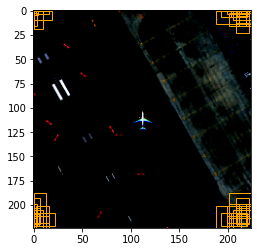

In [ ]:
idx = 0
plot_image_from_output(images[idx], pred[idx])

TODO

1. 클래스 index를 보고 road와 차량을 구분하기
2. road와 차량에 대해 bounding box의 넓이 계산
3. road의 영역 중 차량의 영역의 비율 계산

일단 이걸 prototype으로 사용